In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from model.params.Metric import *
from model.params.Kernel import *
from model.params.Window import *

import numpy as np
from model.knnInteractor import KnnInteractor
from model.knnClassifier import KNNClassifier
from model.dataHandler import DataHandler

ultraviolet = '#9A00F5'
pure_aqua = '#00FFFF'
acid_yellow = '#A1FF00'
neon_red = '#FF005D'

### T1. *Prepare data*

In [26]:
handler = DataHandler('data/laptops.csv', 'processor_brand')
handler.data.head()

,Index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
1,2,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
2,3,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
3,4,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,70990,45,apple,m1,8,8,8,...,No secondary storage,0,apple,apple,False,13.3,2560,1600,mac,1
4,5,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990,56,intel,core i5,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1


In [27]:
handler.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Index                       930 non-null    int64  
 1   brand                       930 non-null    object 
 2   Model                       930 non-null    object 
 3   Price                       930 non-null    int64  
 4   Rating                      930 non-null    int64  
 5   processor_brand             930 non-null    object 
 6   processor_tier              930 non-null    object 
 7   num_cores                   930 non-null    int64  
 8   num_threads                 930 non-null    int64  
 9   ram_memory                  930 non-null    int64  
 10  primary_storage_type        930 non-null    object 
 11  primary_storage_capacity    930 non-null    int64  
 12  secondary_storage_type      930 non-null    object 
 13  secondary_storage_capacity  930 non

In [28]:
print(f'Brand: {handler.data["brand"].unique().__len__()}')
print(handler.data['brand'].unique())
print(f'OS: {handler.data['OS'].unique().__len__()}')
print(handler.data['OS'].unique())
print(f'Primary_storage_type: {handler.data['primary_storage_type'].unique().__len__()}')
print(handler.data['primary_storage_type'].unique())

Brand: 8
['hp' 'acer' 'lenovo' 'apple' 'infinix' 'asus' 'dell' 'msi']
OS: 4
['windows' 'mac' 'other' 'ubuntu']
Primary_storage_type: 2
['SSD' 'HDD']


In [29]:
print(handler.working_copy['Price'].max()-handler.working_copy['Price'].min())
# handler.logarithm('Price')
print(handler.working_copy['Price'].max()-handler.working_copy['Price'].min())

439500
439500


In [30]:
handler.drop_cols(['Index', 'secondary_storage_type', 'secondary_storage_capacity', 'Model', 'processor_tier',
              'is_touch_screen', 'resolution_width', 'resolution_height', 'year_of_warranty', 'gpu_brand', 'gpu_type',
              'display_size'])
handler.working_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   brand                     930 non-null    object
 1   Price                     930 non-null    int64 
 2   Rating                    930 non-null    int64 
 3   processor_brand           930 non-null    object
 4   num_cores                 930 non-null    int64 
 5   num_threads               930 non-null    int64 
 6   ram_memory                930 non-null    int64 
 7   primary_storage_type      930 non-null    object
 8   primary_storage_capacity  930 non-null    int64 
 9   OS                        930 non-null    object
dtypes: int64(6), object(4)
memory usage: 72.8+ KB


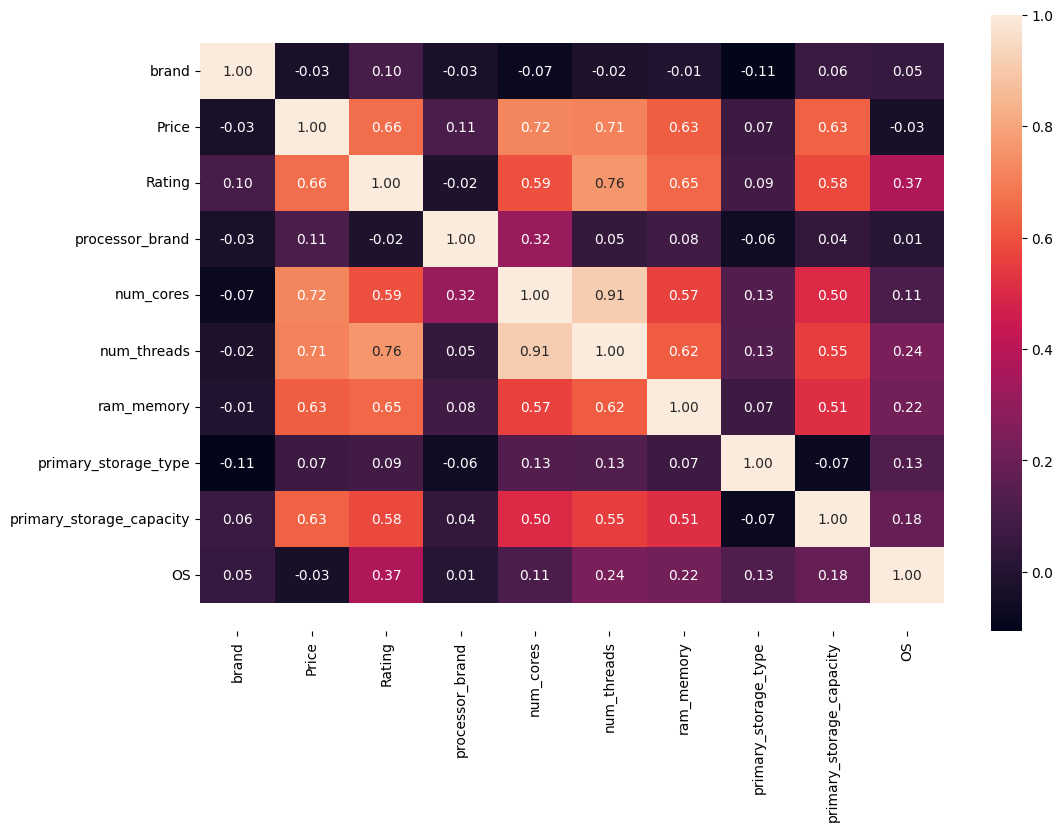

In [31]:
handler.make_correlation()

In [32]:
exdog, endog = handler.make_ex_endog()

exdog.head()

,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,brand_acer,brand_apple,brand_asus,brand_dell,brand_hp,brand_infinix,brand_lenovo,brand_msi,primary_storage_type_HDD,primary_storage_type_SSD,OS_mac,OS_other,OS_ubuntu,OS_windows
0,51100,73,6,12,8,512,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,39990,62,12,16,8,512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,28580,62,4,8,8,512,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,70990,45,8,8,8,256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,34990,56,4,8,16,512,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
exdog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     930 non-null    int64  
 1   Rating                    930 non-null    int64  
 2   num_cores                 930 non-null    int64  
 3   num_threads               930 non-null    int64  
 4   ram_memory                930 non-null    int64  
 5   primary_storage_capacity  930 non-null    int64  
 6   brand_acer                930 non-null    float64
 7   brand_apple               930 non-null    float64
 8   brand_asus                930 non-null    float64
 9   brand_dell                930 non-null    float64
 10  brand_hp                  930 non-null    float64
 11  brand_infinix             930 non-null    float64
 12  brand_lenovo              930 non-null    float64
 13  brand_msi                 930 non-null    float64
 14  primary_st

In [34]:
print(np.unique(endog).__len__())
print(f'assertion: {np.unique(endog).__len__() - handler.working_copy[handler.target_col].unique().__len__()}')

4
assertion: 0


**Just for fun**

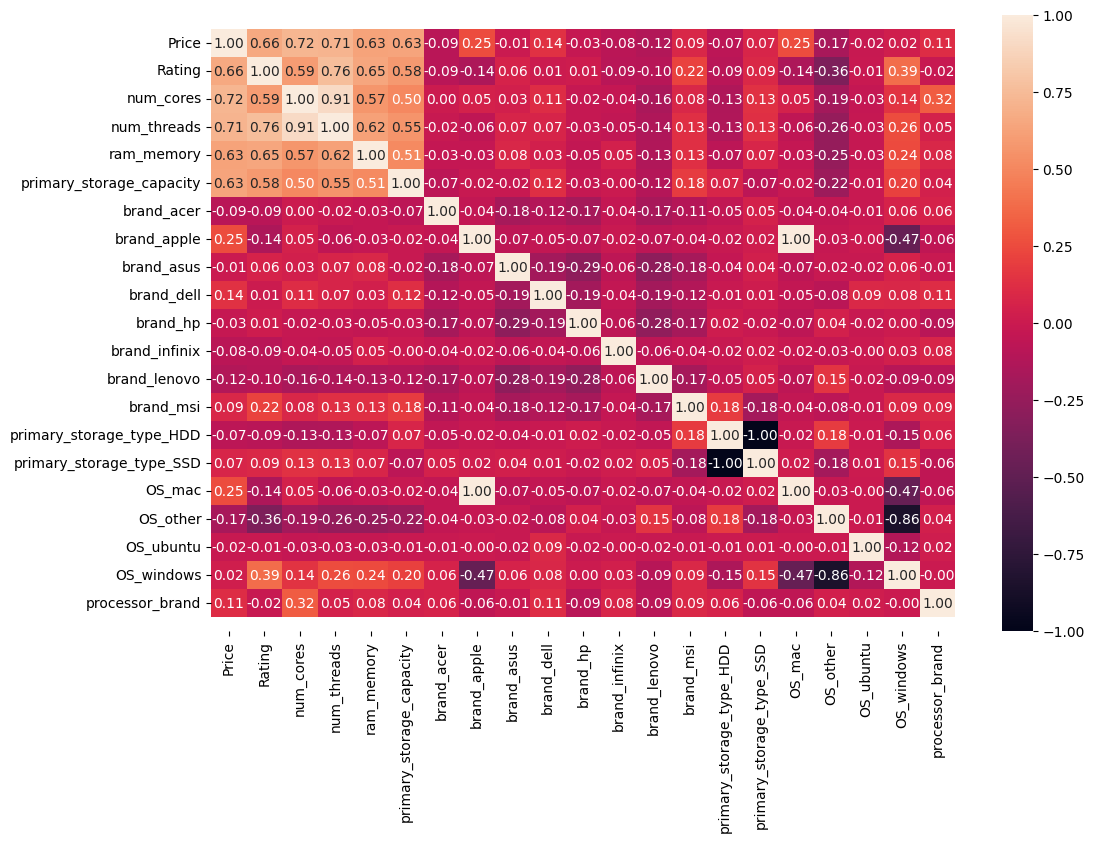

In [35]:
exdog[handler.target_col] = endog
handler.show_correlation(exdog)
exdog = exdog.drop([handler.target_col], axis=1)

### T2. *Set hyperparameters*

***functionality check***

In [36]:
interactor = KnnInteractor(exdog, endog)
knn = KNNClassifier(FixedWindow(0.26), EpanechKernel(), Metric.COSIN).fit(interactor.train_exdog, interactor.train_ans,interactor.default_weights)
predictions = knn.predict(interactor.test_exdog)
print(predictions)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [37]:
print(interactor.accuracy(interactor.test_ans, predictions))

69.89247311827957


**Best parameters for impl**

window: `FIXED -> h[1e-2 : 1.0]` or `relative -> k[1 : train.len]`

kernel: `Uniform`, `Gaussian`, `Triangular`, `Epanechnikov`

metric: `CHEBYSHEV`, `COSINE`, `MINKOWSKI`

In [38]:
interactor.get_best_impl_klassifier()

[I 2024-03-20 12:39:36,410] A new study created in memory with name: no-name-015a45b1-edcf-4505-8238-7ebb44ab941f
C:\Users\chura\Х#й#я\DA_ML\lab1-knn-BrainCallus\knn\.venv\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <function cosine at 0x00000212C9626200> which is of type function.
  warnings.warn(message)
C:\Users\chura\Х#й#я\DA_ML\lab1-knn-BrainCallus\knn\.venv\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <function chebyshev at 0x00000212C9626660> which is of type function.
  warnings.warn(message)
C:\Users\chura\Х#й#я\DA_ML\lab1-knn-BrainCallus\knn\.venv\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str 

 [INFO] KnnInteractor 2024-03-20 12:39:46.069889: Best fixed: FrozenTrial(number=31, state=1, values=[70.96774193548387], datetime_start=datetime.datetime(2024, 3, 20, 12, 39, 36, 993413), datetime_complete=datetime.datetime(2024, 3, 20, 12, 39, 37, 12410), params={'fixed:h': 0.7174316133670828, 'kernel': 'Epanechnikov', 'metric': <function cosine at 0x00000212C9626200>}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'fixed:h': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'kernel': CategoricalDistribution(choices=('Uniform', 'Gaussian', 'Triangular', 'Epanechnikov')), 'metric': CategoricalDistribution(choices=(<function cosine at 0x00000212C9626200>, <function chebyshev at 0x00000212C9626660>, <function minkowski at 0x00000212C9625F80>))}, trial_id=31, value=None)
 [INFO] KnnInteractor 2024-03-20 12:39:46.069889: Best relative: FrozenTrial(number=95, state=1, values=[73.11827956989248], datetime_start=datetime.datetime(2024, 3, 20, 12, 39, 45, 7

**Best parameters for scikit**

k: `[1 : 500]`

weight function: `uniform`, `distance`

algorithm: `ball_tree`, `kd_tree`, `brute`

minkowski degree(p): `[1.0 : 5.0]`

In [39]:
interactor.get_best_lib_klassifier()

[I 2024-03-20 12:39:46,073] A new study created in memory with name: no-name-4fe7d588-b1c2-459f-85e1-43ea629cace1
[I 2024-03-20 12:39:46,106] Trial 0 finished with value: 66.66666666666666 and parameters: {'k': 217, 'weight function': 'distance', 'algorithm': 'ball_tree', 'minkowski degree': 4.243954965439306}. Best is trial 0 with value: 66.66666666666666.
[I 2024-03-20 12:39:46,152] Trial 1 finished with value: 68.81720430107528 and parameters: {'k': 460, 'weight function': 'distance', 'algorithm': 'kd_tree', 'minkowski degree': 4.9023473083810964}. Best is trial 1 with value: 68.81720430107528.
[I 2024-03-20 12:39:46,201] Trial 2 finished with value: 68.81720430107528 and parameters: {'k': 399, 'weight function': 'distance', 'algorithm': 'ball_tree', 'minkowski degree': 2.992881679199385}. Best is trial 1 with value: 68.81720430107528.
[I 2024-03-20 12:39:46,252] Trial 3 finished with value: 68.81720430107528 and parameters: {'k': 433, 'weight function': 'distance', 'algorithm': 'ba

 [INFO] KnnInteractor 2024-03-20 12:39:51.209263: Best scikit: FrozenTrial(number=63, state=1, values=[72.58064516129032], datetime_start=datetime.datetime(2024, 3, 20, 12, 39, 49, 145536), datetime_complete=datetime.datetime(2024, 3, 20, 12, 39, 49, 209536), params={'k': 28, 'weight function': 'uniform', 'algorithm': 'brute', 'minkowski degree': 2.109792100529593}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'k': IntDistribution(high=500, log=False, low=1, step=1), 'weight function': CategoricalDistribution(choices=('uniform', 'distance')), 'algorithm': CategoricalDistribution(choices=('ball_tree', 'kd_tree', 'brute')), 'minkowski degree': FloatDistribution(high=5.0, log=False, low=1.0, step=None)}, trial_id=63, value=None)
 [INFO] KnnInteractor 2024-03-20 12:39:51.209263: Best scikit params: {'k': 28, 'weight function': 'uniform', 'algorithm': 'brute', 'minkowski degree': 2.109792100529593}


### T3. *Window parameter dependency*

In [40]:
from sklearn.neighbors import KNeighborsClassifier

best_impl_params: (Window, Kernel, Metric) = interactor.best_knn_params_impl
best_lib_params: (int, str, str, float) = interactor.best_knn_params_lib


def get_accuracy_for_k_impl(k_, x, y):
    preds = KNNClassifier(RelativeWindow(k_), best_impl_params[1], best_impl_params[2]).fit(
        interactor.train_exdog, interactor.train_ans, interactor.default_weights).predict(x)
    return interactor.accuracy(y, preds)


def get_accuracy_for_k_lib(k_, x, y):
    preds = KNeighborsClassifier(n_neighbors=k_, weights=best_lib_params[1], algorithm=best_lib_params[2],
                                 p=best_lib_params[3]).fit(
        interactor.train_exdog, interactor.train_ans).predict(x)
    return interactor.accuracy(y, preds)


In [41]:
train_impl, test_impl, train_lib, test_lib = [], [], [], []
ox = [x for x in range(1, 151)]
for k in ox:
    train_impl.append(get_accuracy_for_k_impl(k, interactor.train_exdog, interactor.train_ans))
    train_lib.append(get_accuracy_for_k_lib(k, interactor.train_exdog, interactor.train_ans))
    test_impl.append(get_accuracy_for_k_impl(k, interactor.test_exdog, interactor.test_ans))
    test_lib.append(get_accuracy_for_k_lib(k, interactor.test_exdog, interactor.test_ans))


C:\Users\chura\Х#й#я\DA_ML\lab1-knn-BrainCallus\knn\model\knnClassifier.py:46: RuntimeWarning: invalid value encountered in scalar divide
  kernel_x = dist[i] / self.window.get_kernel_param_divvisor(dist)


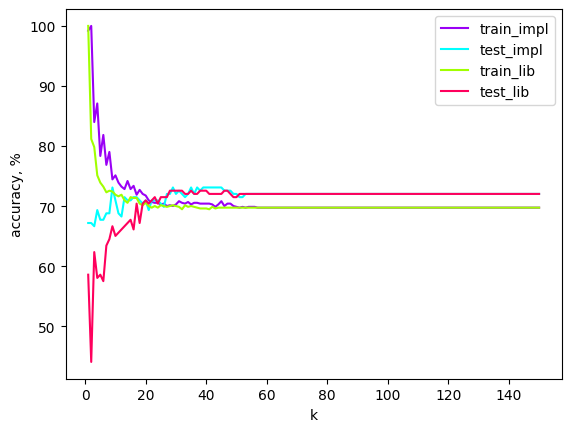

In [42]:
plt.plot(ox, train_impl, label='train_impl', c=ultraviolet)
plt.plot(ox, test_impl, label='test_impl', c=pure_aqua)
plt.plot(ox, train_lib, label='train_lib', c=acid_yellow)
plt.plot(ox, test_lib, label='test_lib', c=neon_red)
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()

### T4. *Lowess*

In [43]:
_norm, anomalies1, anomalies2 = interactor.get_anomalies(interactor.train_exdog, interactor.train_ans, interactor.best_knn_params_impl)
interactor.logger.info(f'Accuracy: {_norm.__len__() / interactor.train_exdog.__len__() * 100}')
interactor.logger.info(f'1 type anomalies: {anomalies1.__len__()}')
interactor.logger.info(f'2 type anomalies: {anomalies2.__len__()}')

 [INFO] KnnInteractor 2024-03-20 12:40:29.735988: Accuracy: 69.22043010752688
 [INFO] KnnInteractor 2024-03-20 12:40:29.736988: 1 type anomalies: 15
 [INFO] KnnInteractor 2024-03-20 12:40:29.736988: 2 type anomalies: 214


In [44]:
ox = [x * 0.1 for x in range(1, 101)]
oy_train = [interactor.get_accuracy_weighted(interactor.train_exdog,  interactor.train_ans, w,anomalies1, anomalies2) for w in ox]
oy_test = [interactor.get_accuracy_weighted(interactor.test_exdog, interactor.test_ans, w, anomalies1, anomalies2) for w in ox]

Text(0.5, 1.0, 'Weights for train impl')

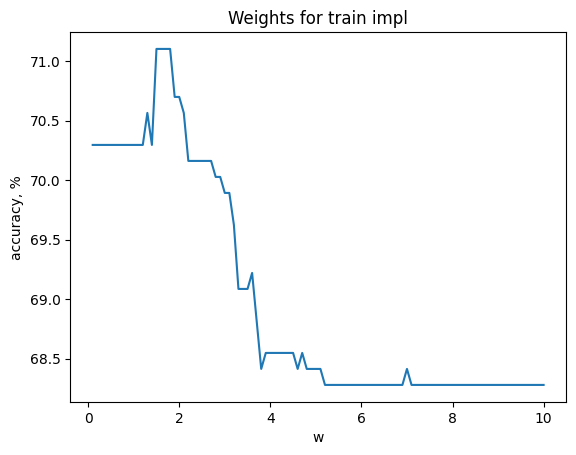

In [45]:
plt.plot(ox, oy_train)
plt.xlabel('w')
plt.ylabel('accuracy, %')
plt.title('Weights for train impl')

Text(0.5, 1.0, 'Weights for test impl')

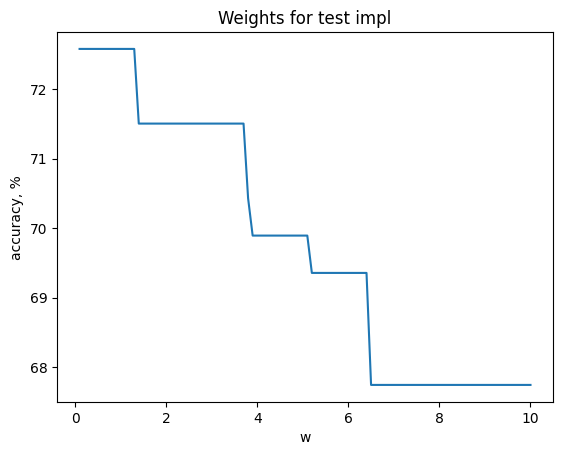

In [46]:
plt.plot(ox, oy_test)
plt.xlabel('w')
plt.ylabel('accuracy, %')
plt.title('Weights for test impl')

In [47]:
def lib_accuracy_sampled(train_x, train_y, test_x, test_y):
    klassifier = KNeighborsClassifier(n_neighbors=best_lib_params[0], weights=best_lib_params[1], algorithm=best_lib_params[2], p=best_lib_params[3])
    preds = klassifier.fit(train_x, train_y).predict(test_x)
    return interactor.accuracy(test_y, preds)

In [48]:
sampled_exdog = pd.concat([interactor.train_exdog, interactor.train_exdog.iloc[anomalies1]])
sampled_endog = np.concatenate((interactor.train_ans, [interactor.train_ans[i] for i in anomalies1]))
interactor.logger.info(f'Accuracy: {lib_accuracy_sampled(interactor.train_exdog, interactor.train_ans, interactor.test_exdog, interactor.test_ans)}')
interactor.logger.info(f'Sampled accuracy: {lib_accuracy_sampled(sampled_exdog, sampled_endog, interactor.test_exdog, interactor.test_ans)}')

 [INFO] KnnInteractor 2024-03-20 12:40:36.464804: Accuracy: 72.58064516129032
 [INFO] KnnInteractor 2024-03-20 12:40:36.499806: Sampled accuracy: 72.58064516129032
